In [2]:
import sys
root_dir = !cd .. &&pwd
root_dir = root_dir[0] + "/"
sys.path.insert(0, root_dir)

In [3]:
print(root_dir)

/Users/philip/DIKU/bachelor_project/


### Imports

In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from our_modules.eval_tools import load_and_eval_mls_osr
from our_modules.plot_tools import plot_roc
from data.tinyimagenet import TinyImageNet
from our_modules.tin_tools import test_transform

### Setting the Device

In [6]:
if sys.platform == 'darwin':
    device = torch.device("mps")
else:
    gpu = torch.cuda.is_available()
    device = torch.device("cuda:0" if gpu else "cpu")

print("device:", device)

device: mps


In [5]:
roc_stats_plain, _ = load_and_eval_mls_osr(root_dir + "logits/tinyimagenet/plain/logits_0.pt", root_dir + "logits/tinyimagenet/plain/csr_targets_0.pt",
                      0, dataset_name='tinyimagenet')
# roc_stats_fp, _ = load_and_eval_mls_osr(root_dir + "logits/tinyimagenet/fgsm_fp_attack/logits_split_0.pt", root_dir + "logits/tinyimagenet/plain/csr_targets_split_0.pt",
#                                       0, dataset_name='tinyimagenet')
# roc_stats_fn, _ = load_and_eval_mls_osr(root_dir + "logits/tinyimagenet/fgsm_fn_attack/logits_split_0.pt", root_dir + "logits/tinyimagenet/plain/csr_targets_split_0.pt",
#                                       0, dataset_name='tinyimagenet')

NameError: name 'roc_stats_fp' is not defined

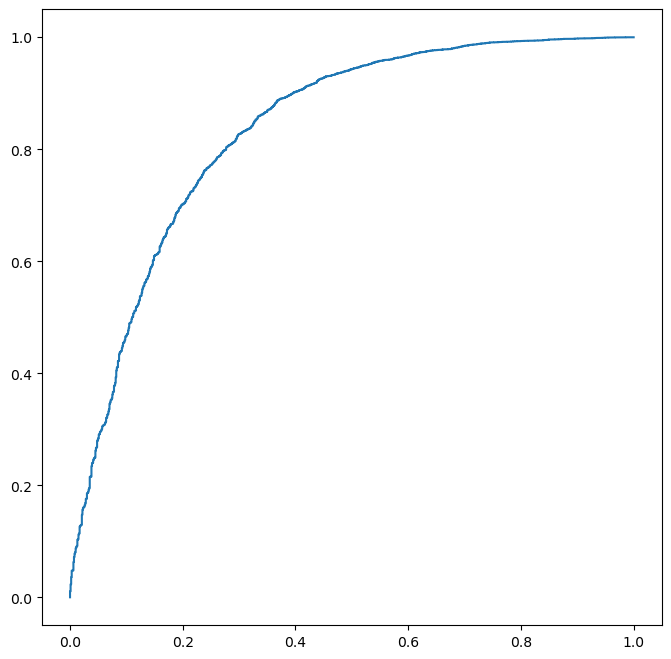

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
plot_roc(ax, roc_stats_plain, label='Before')
# plot_roc(ax, roc_stats_fp, label="FP attack")
# plot_roc(ax, roc_stats_fn, label="FN attack")
plt.legend()
plt.show()

In [17]:
data = TinyImageNet(root_dir + 'datasets/tiny-imagenet-200/val/images/', test_transform)

In [20]:
for x, _, _ in data:
    print(torch.max(x))
    print(torch.min(x))
    1/0

tensor(2.7537)
tensor(-2.4097)


ZeroDivisionError: division by zero

In [19]:
logits = np.random.sample((100, 3))-0.5
max_logits = np.amax(logits, axis=-1)
max_logits_sorted = sorted(enumerate(max_logits), key=lambda x: x[1])
max_softmax_func = lambda Tinv: np.exp(np.amax(logits, axis= -1)*Tinv)/np.sum(np.exp(logits*Tinv), axis=-1)
max_softmax_before_sorted = sorted(enumerate(max_softmax_func(1)), key=lambda x: x[1])


In [21]:
print(max_logits_sorted)

[(8, -0.3870568344020914), (31, -0.37775912343901663), (65, -0.34330583344924936), (78, -0.22278494367504154), (29, -0.2080008260197388), (99, -0.16141143641291933), (56, -0.1168714230715171), (84, -0.10894549763290962), (51, -0.10795995003061054), (32, -0.10190338900206142), (58, -0.09557812610532301), (90, -0.0823481765738654), (55, -0.06650558429170428), (46, -0.0577200137536481), (26, -0.03491813253721965), (5, 0.0027273696833970407), (54, 0.016090022768565526), (94, 0.019125950202234954), (49, 0.021425201359574708), (33, 0.02246052152724365), (95, 0.03280269214546183), (85, 0.03570435849801956), (30, 0.03779619033209369), (73, 0.03886197681959447), (82, 0.053377096899168586), (34, 0.05547326913985995), (20, 0.08078196578300778), (87, 0.08079932299232284), (80, 0.08095252044144108), (21, 0.08766667703107056), (11, 0.10791417859374464), (13, 0.11054025958859681), (57, 0.1308228469803442), (27, 0.13797139417750892), (71, 0.14033810262231494), (10, 0.14563092700722557), (98, 0.1521660

In [29]:
for Tinv in [1, 10, 100, 1000]:
    print(sorted(enumerate(max_softmax_func(Tinv)), key=lambda x: x[1]))

[(31, 0.34019668634520867), (82, 0.3434508419739397), (65, 0.3486500800818548), (8, 0.3494659872238666), (19, 0.3523240808390556), (80, 0.3533484439561324), (49, 0.3610747254654338), (27, 0.3617140127369106), (78, 0.3618699567665465), (51, 0.3638426434911741), (71, 0.36390388430789233), (32, 0.36965113974436614), (84, 0.37057875056369777), (53, 0.3714928199185766), (55, 0.3747190037376705), (29, 0.37611371283842515), (11, 0.37786456395034057), (40, 0.3779525863086869), (22, 0.37797587872065275), (26, 0.378020566436809), (76, 0.37908833749500503), (48, 0.3801529121297322), (60, 0.38160265385952524), (46, 0.38434070445570384), (68, 0.3847251911805134), (94, 0.389745587552787), (72, 0.3925065633130433), (99, 0.39329152832693004), (38, 0.3946827966093175), (95, 0.3949978147434177), (7, 0.39571546854723166), (57, 0.3966938471580095), (90, 0.3972523855379899), (21, 0.39806208153068), (47, 0.39817440308140395), (58, 0.39959290756248517), (23, 0.3997121666725616), (13, 0.39974192806380965), (1